In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [16]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [17]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


In [18]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [22]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


df.loc[condition]

In [25]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [26]:
df.loc[df['   TG'] != -9999]['   TG'].mean()

63.607875261284676

In [27]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

-28.8

In [28]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

26.2

<Axes: >

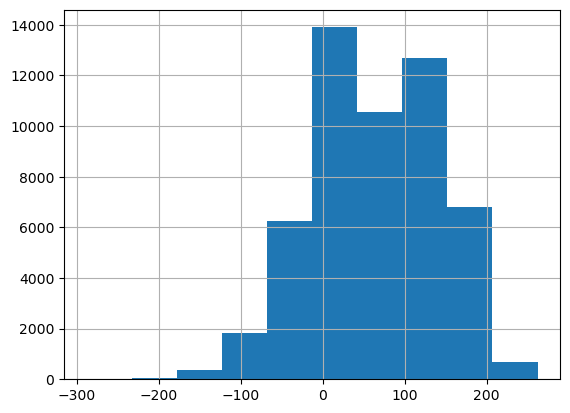

In [30]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

get row / cells

In [31]:
df.loc[df['    DATE']=="1860-01-05"]

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,0


In [34]:
df.loc[df['    DATE']=="1860-01-05"]['   TG']

4    31
Name:    TG, dtype: int64

to get data without row-id

In [36]:
df.loc[df['    DATE']=="1860-01-05"]['   TG'].squeeze() / 10

3.1

In [41]:
df.loc[df['   TG'] == df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


In [40]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [42]:
df.loc[3, '   TG']

37

# Calculate a new column out of eisting column

In [49]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Far,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82,NaN


In [50]:
df["TG"] = df['TG0'] / 10

In [52]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Far,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN


In [53]:
df["Far"] = df['TG'] * (9/5) + 32

In [54]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Far,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


<Axes: >

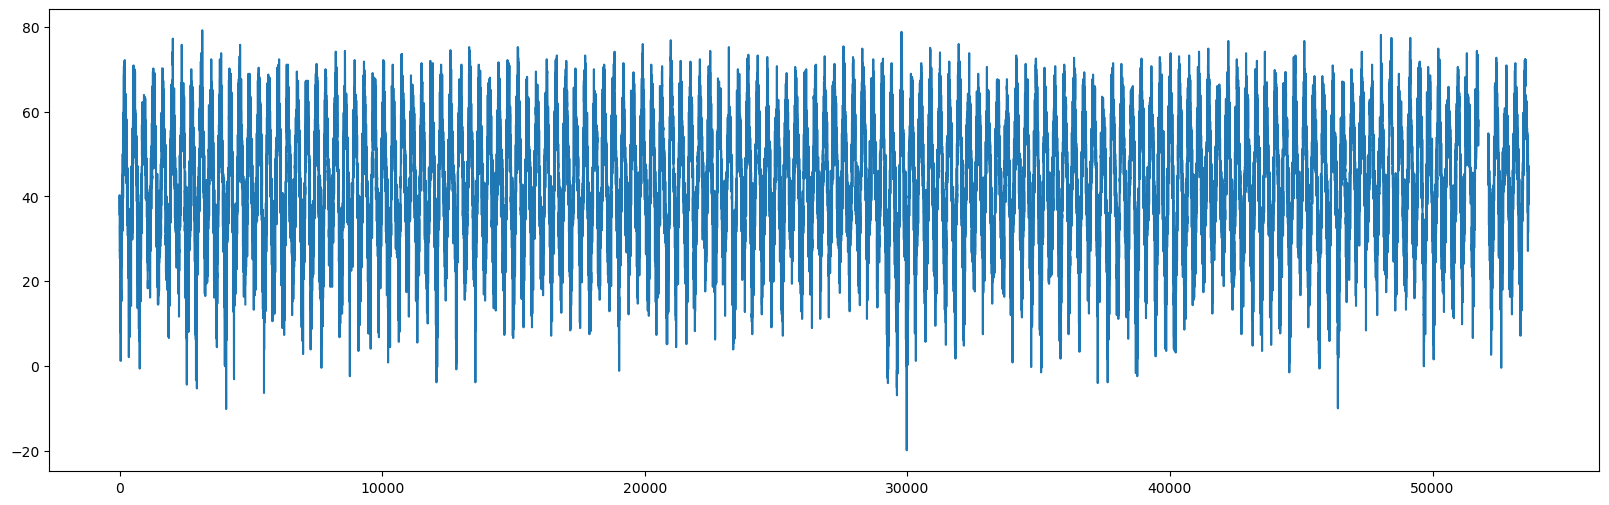

In [62]:
df['Far'].plot(x='    DATE', y='TG', figsize=(20, 6))

<Axes: xlabel='    DATE'>

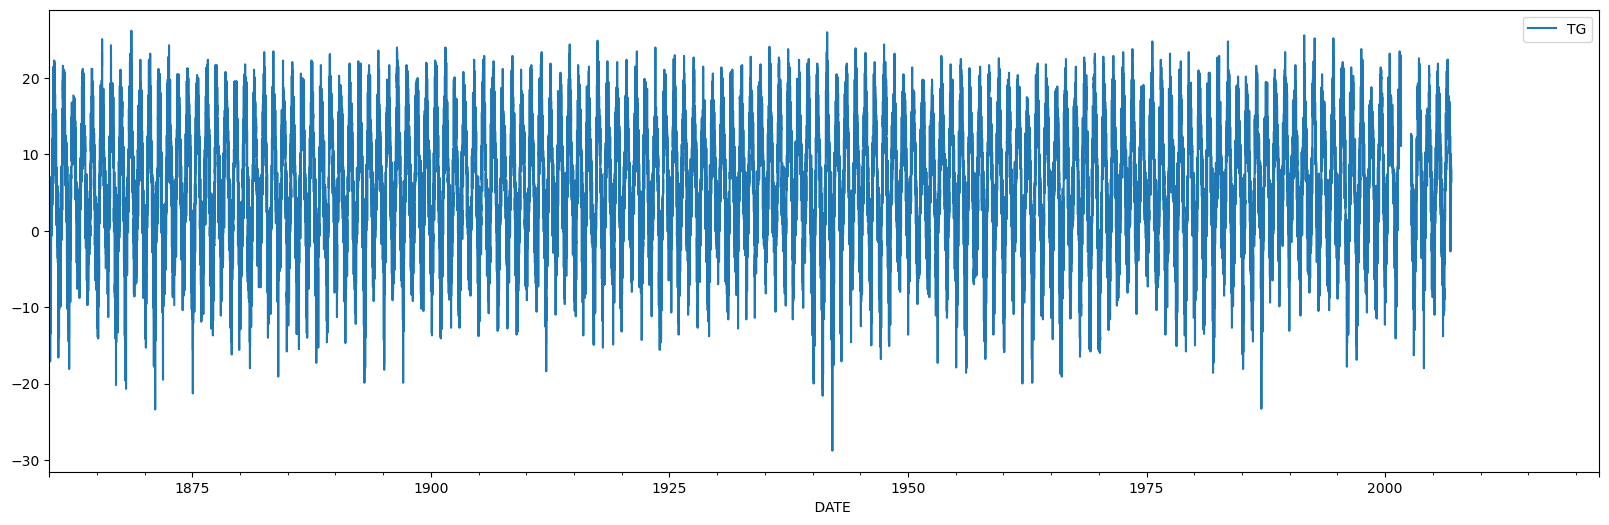

In [63]:
df.plot(x='    DATE', y='TG', figsize=(20, 6))

<Axes: xlabel='    DATE'>

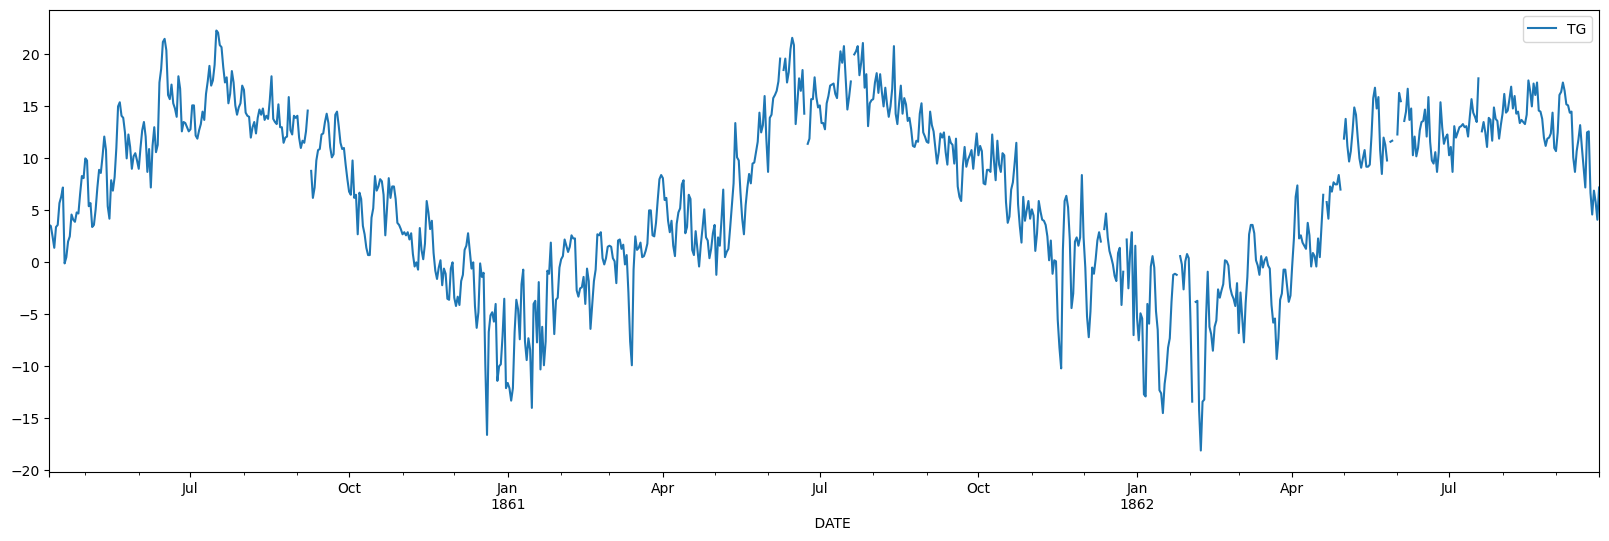

In [64]:
df[100:1000].plot(x='    DATE', y='TG', figsize=(20, 6))

In [135]:
import requests
response = requests.get('http://127.0.0.1:5000/api/v1/1/20230101')
response.content

b'Date or Temperature Not Found'

In [149]:
import requests
response = requests.get('http://127.0.0.1:5000/api/v1/sunn')
response.content

b'404'

In [161]:
import requests
response = requests.get('http://127.0.0.1:5000/api/v1/stations/11/year/1996')
response.content

b'[\n  {\n    "    DATE": "1996-01-11",\n    "   TG": -7,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-12",\n    "   TG": 4,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-13",\n    "   TG": 6,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-14",\n    "   TG": -4,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-15",\n    "   TG": -27,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-16",\n    "   TG": -31,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-17",\n    "   TG": -53,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-18",\n    "   TG": -62,\n    " Q_TG": 0,\n    " SOUID": 6022,\n    "STAID": 11\n  },\n  {\n    "    DATE": "1996-01-19",\n    "   TG": -34,\n    " Q_TG": 0,\n 